<a href="https://colab.research.google.com/github/Praise-Atadja/Early-Intervention-Intelligence-for-Cognitive-Development/blob/main/Early_Intervention_Intelligence_For_Cognitive_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **PRJECT NAME:**

##EARLY INTERVENTION INTELLIGENCE FOR COGNITIVE DEVELOPMENT (IICD)


---



(***This project is to predict the possibility of autism for toddlers.***)







# **CASE STUDY IMPLEMENTATION**

**Abstract**:
Autistic Spectrum Disorder (ASD) is a neurodevelopmental condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective.

**Objective:**


1.   Implement two machine learning models:


*   Develop a simple neural network-based model on the selected dataset without employing any optimization techniques.

*   Develop a second model applying at least three optimization techniques.


2.   Discuss the results of optimizations and parameter settings for each model.


3.   Utilize separate training, validation, and test datasets for model evaluation.

2.   
Make predictions using the test data and evaluate the models' performance.










# **SECTION 1: The Dataset**
**Short Description of the Data:**

In this dataset, we record ten behavioural features (Q-Chat-10) plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.


**Attributes:**

A1-A10: Items within Q-Chat-10 in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10, if the respose was Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed. The remaining features in the datasets are collected from the “submit” screen in the ASDTests screening app. It should be noted that the class varaible was assigned automatically based on the score obtained by the user while undergoing the screening process using the ASDTests app.


Link to Dataset Source :

https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers

#  Analyzing the Data

In [ ]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, Flatten, Dense
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
file_path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


A1 - A10 are some questions and their answer is given as labels '1' or '0'.

The questions are as follows :

A1 -> Does your child look at you when you call his/her name?

A2 -> How easy is it for you to get eye contact with your child?

A3 -> Does your child point to indicate that s/he wants something? (e.g. a toy that is
out of reach)

A4 -> Does your child point to share interest with you? (e.g. poin9ng at an
interes9ng sight)

A5 -> Does your child pretend? (e.g. care for dolls, talk on a toy phone)

A6 -> Does your child follow where you’re looking?

A7 -> If you or someone else in the family is visibly upset, does your child show signs
of wan9ng to comfort them? (e.g. stroking hair, hugging them)

A8 -> Would you describe your child’s first words as:

A9 -> Does your child use simple gestures? (e.g. wave goodbye)

A10 -> Does your child stare at nothing with no apparent purpose?


In [ ]:
# Inspect the structure
print(df.head())  # Display the first few rows
print(df.info())   # Get information about the dataset

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score Sex  \
1   1   1   0   0   0   1   1   0   0    0        36               4   m   
2   1   0   0   0   0   0   1   1   0    1        36               4   m   
3   1   1   1   1   1   1   1   1   1    1        24              10   m   
4   1   1   0   1   1   1   1   1   1    1        20               9   f   
5   1   1   0   0   1   1   1   1   1    1        21               8   m   

        Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
1  White European      yes                  no          family member   
2  middle eastern      yes                  no          family member   
3        Hispanic       no                  no          family member   
4  White European       no                 yes          family member   
5           black       no                  no          family member   

  Class/ASD Traits   
1               Yes  
2               Yes  
3               Yes  
4               

In [ ]:
#Check for missing data
df.isna().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

No missing values

In [ ]:
# Remove missing columns
df_cleaned = df.dropna(axis=1)


# Drop rows with missing values
df.dropna(inplace=True)


No missing columns and rows

In [ ]:
print(df.columns)


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [ ]:
df=df.drop("Case_No",axis=1)

In [ ]:
# Explore the distribution of features and target variable
print(df.describe())
print(df['Class/ASD Traits '].value_counts())

               A1          A2          A3          A4          A5          A6  \
count  728.000000  728.000000  728.000000  728.000000  728.000000  728.000000   
mean     0.730769    0.603022    0.535714    0.681319    0.712912    0.765110   
std      0.443865    0.489608    0.499066    0.466286    0.452714    0.424222   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               A7          A8          A9         A10    Age_Mons  \
count  728.000000  728.000000  728.000000  728.000000  728.000000   
mean     0.829670    0.601648    0.682692    0.645604   28.223901   
std      0.376181    0.489895    0.465748    0.478659    7.4919

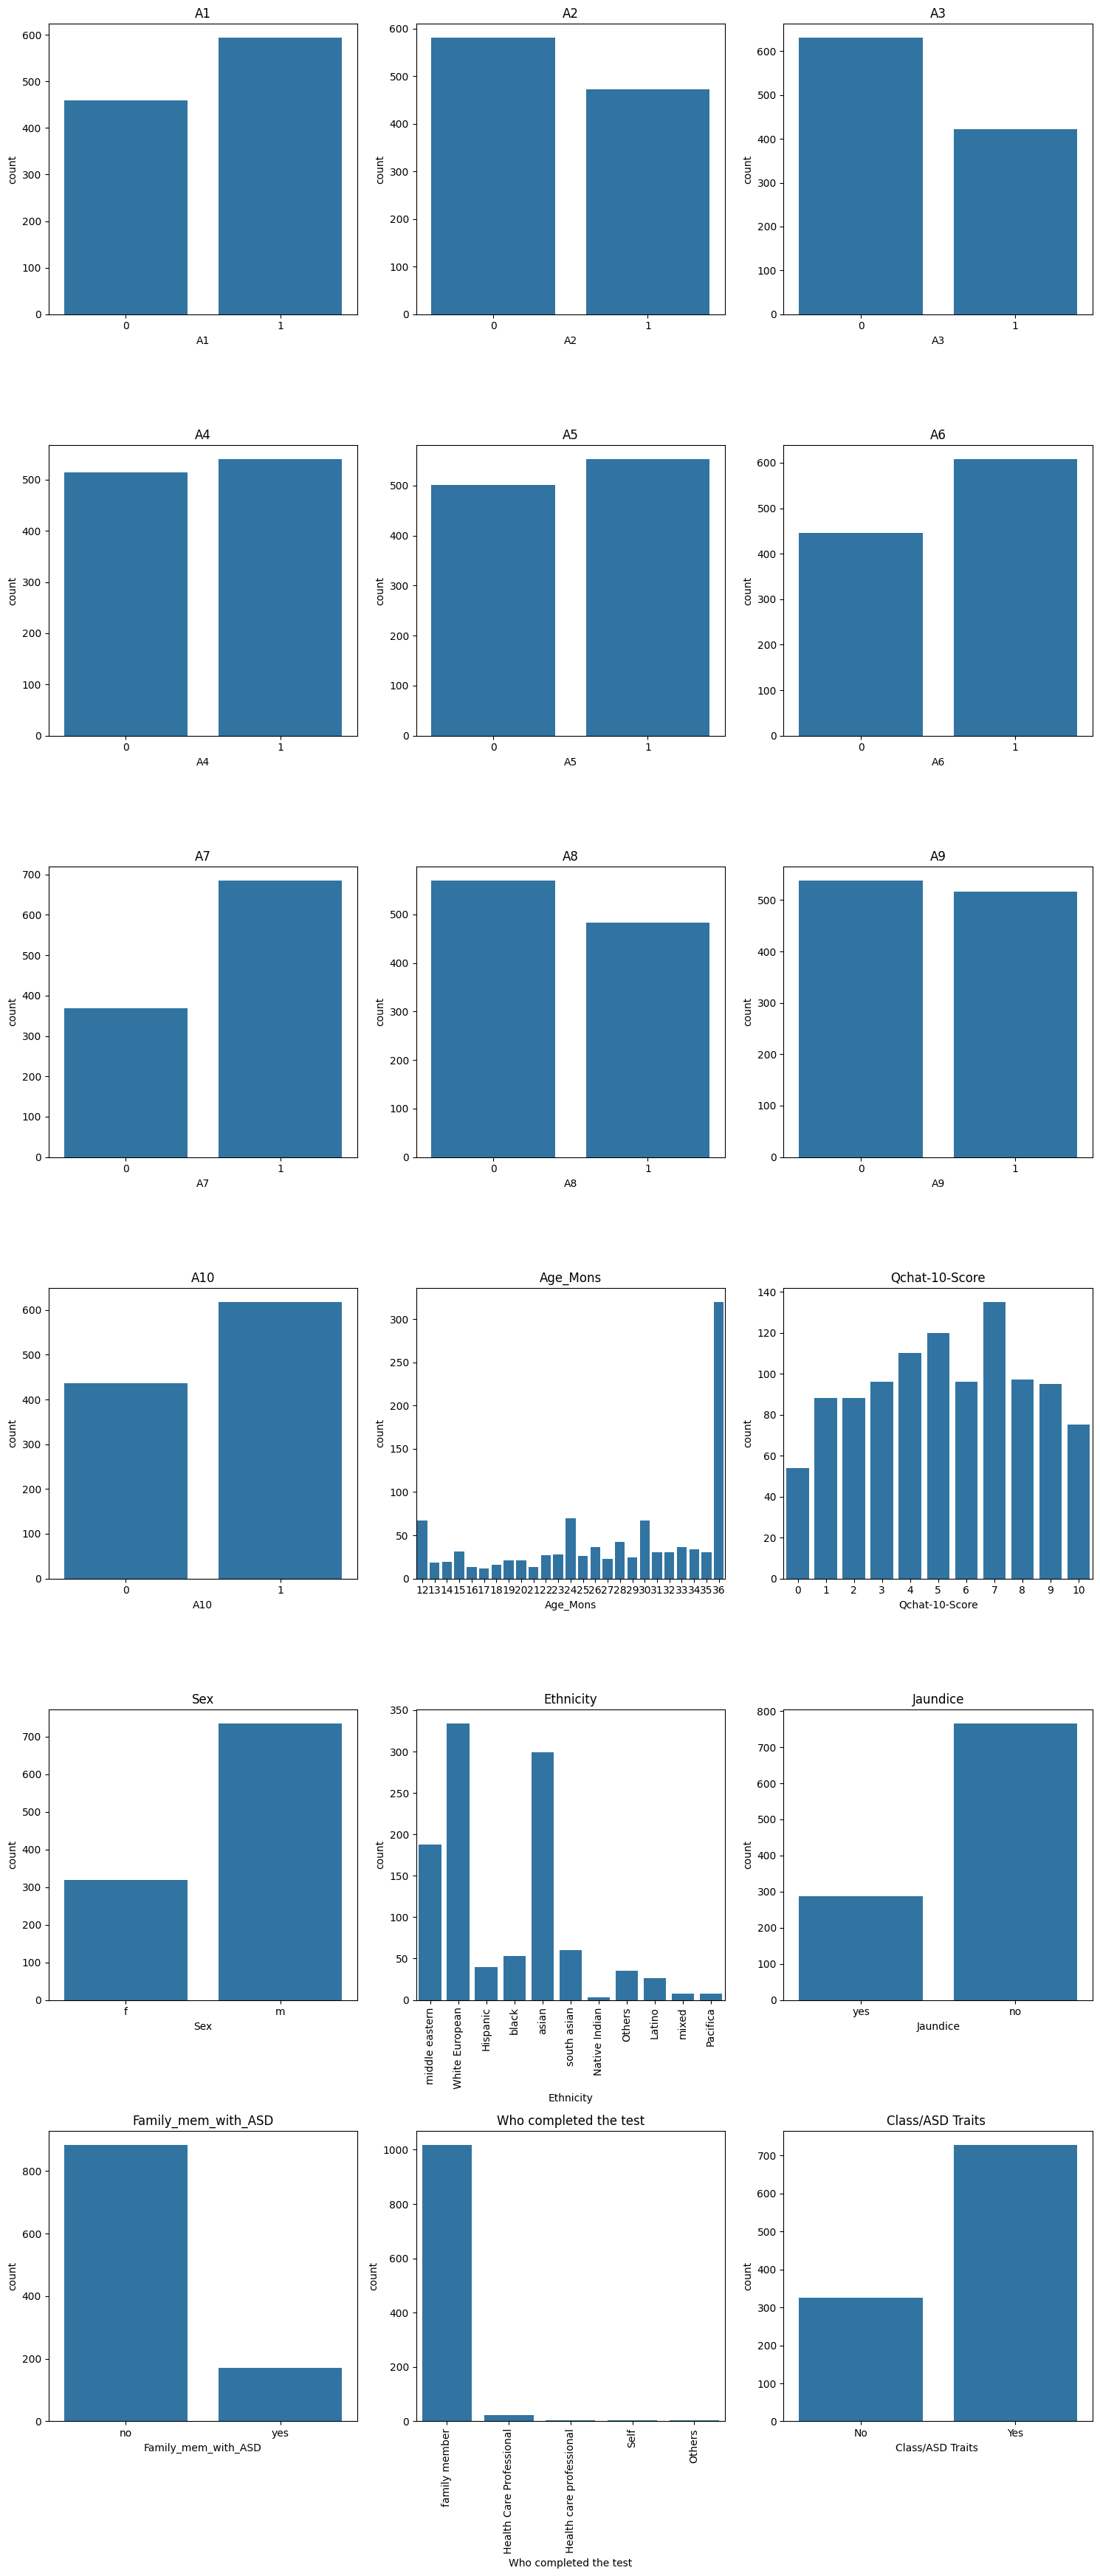

In [ ]:
# Countplot for each feature
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(df.iloc[:,:]):
    sns.countplot(x=df[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

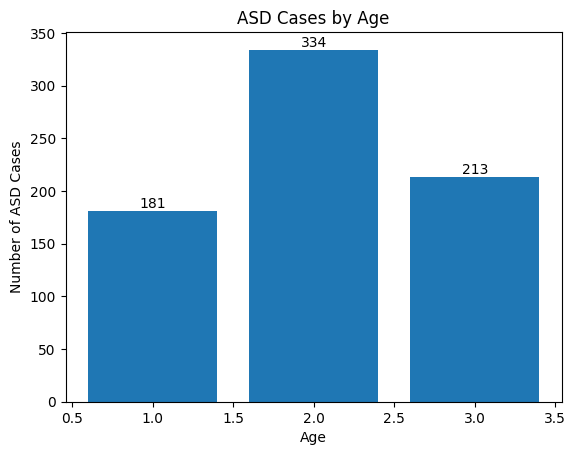

In [ ]:
# How age is an influence
d = pd.DataFrame()
d["Age"]=(df["Age_Mons"]/12).astype(int)
d["ASD"]=df['Class/ASD Traits ']

asd_counts = d[d['ASD'] == 'Yes'].groupby('Age').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()



Conclusion: The chances of getting affected by ASD are highest at the age of 2 years.

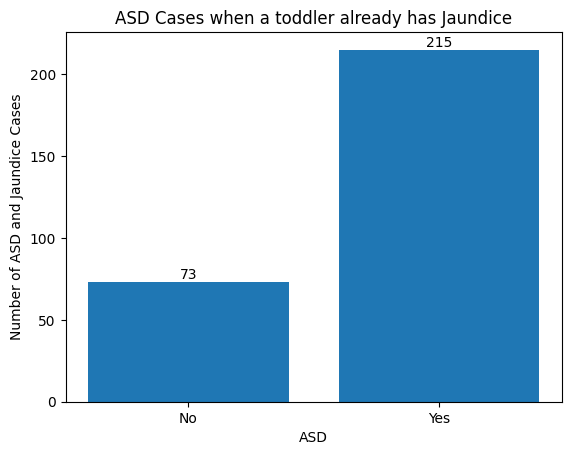

In [ ]:
# Toddlers who have Jaundice and then they have ASD
asd_counts_jaundice = df[df['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()


Conclusion : The Toddlers having Jaundice are more prone to ASD in comparision to normal toddlers.

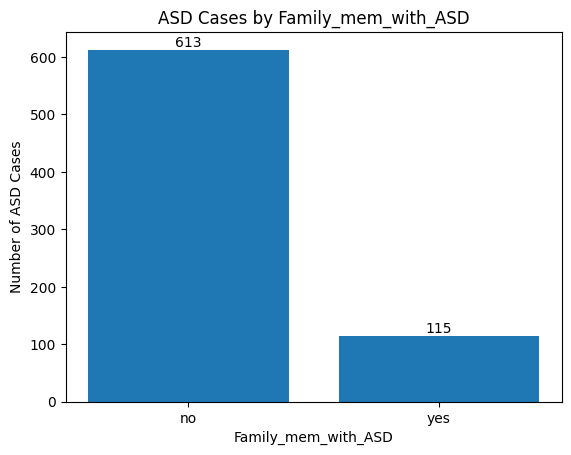

In [ ]:
#Family members with ASD
asd_counts = df[df['Class/ASD Traits '] == 'Yes'].groupby('Family_mem_with_ASD').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Family_mem_with_ASD')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

Conclusion : The Toddlers having family members with ASD doesn't mean they are likely to get ASD

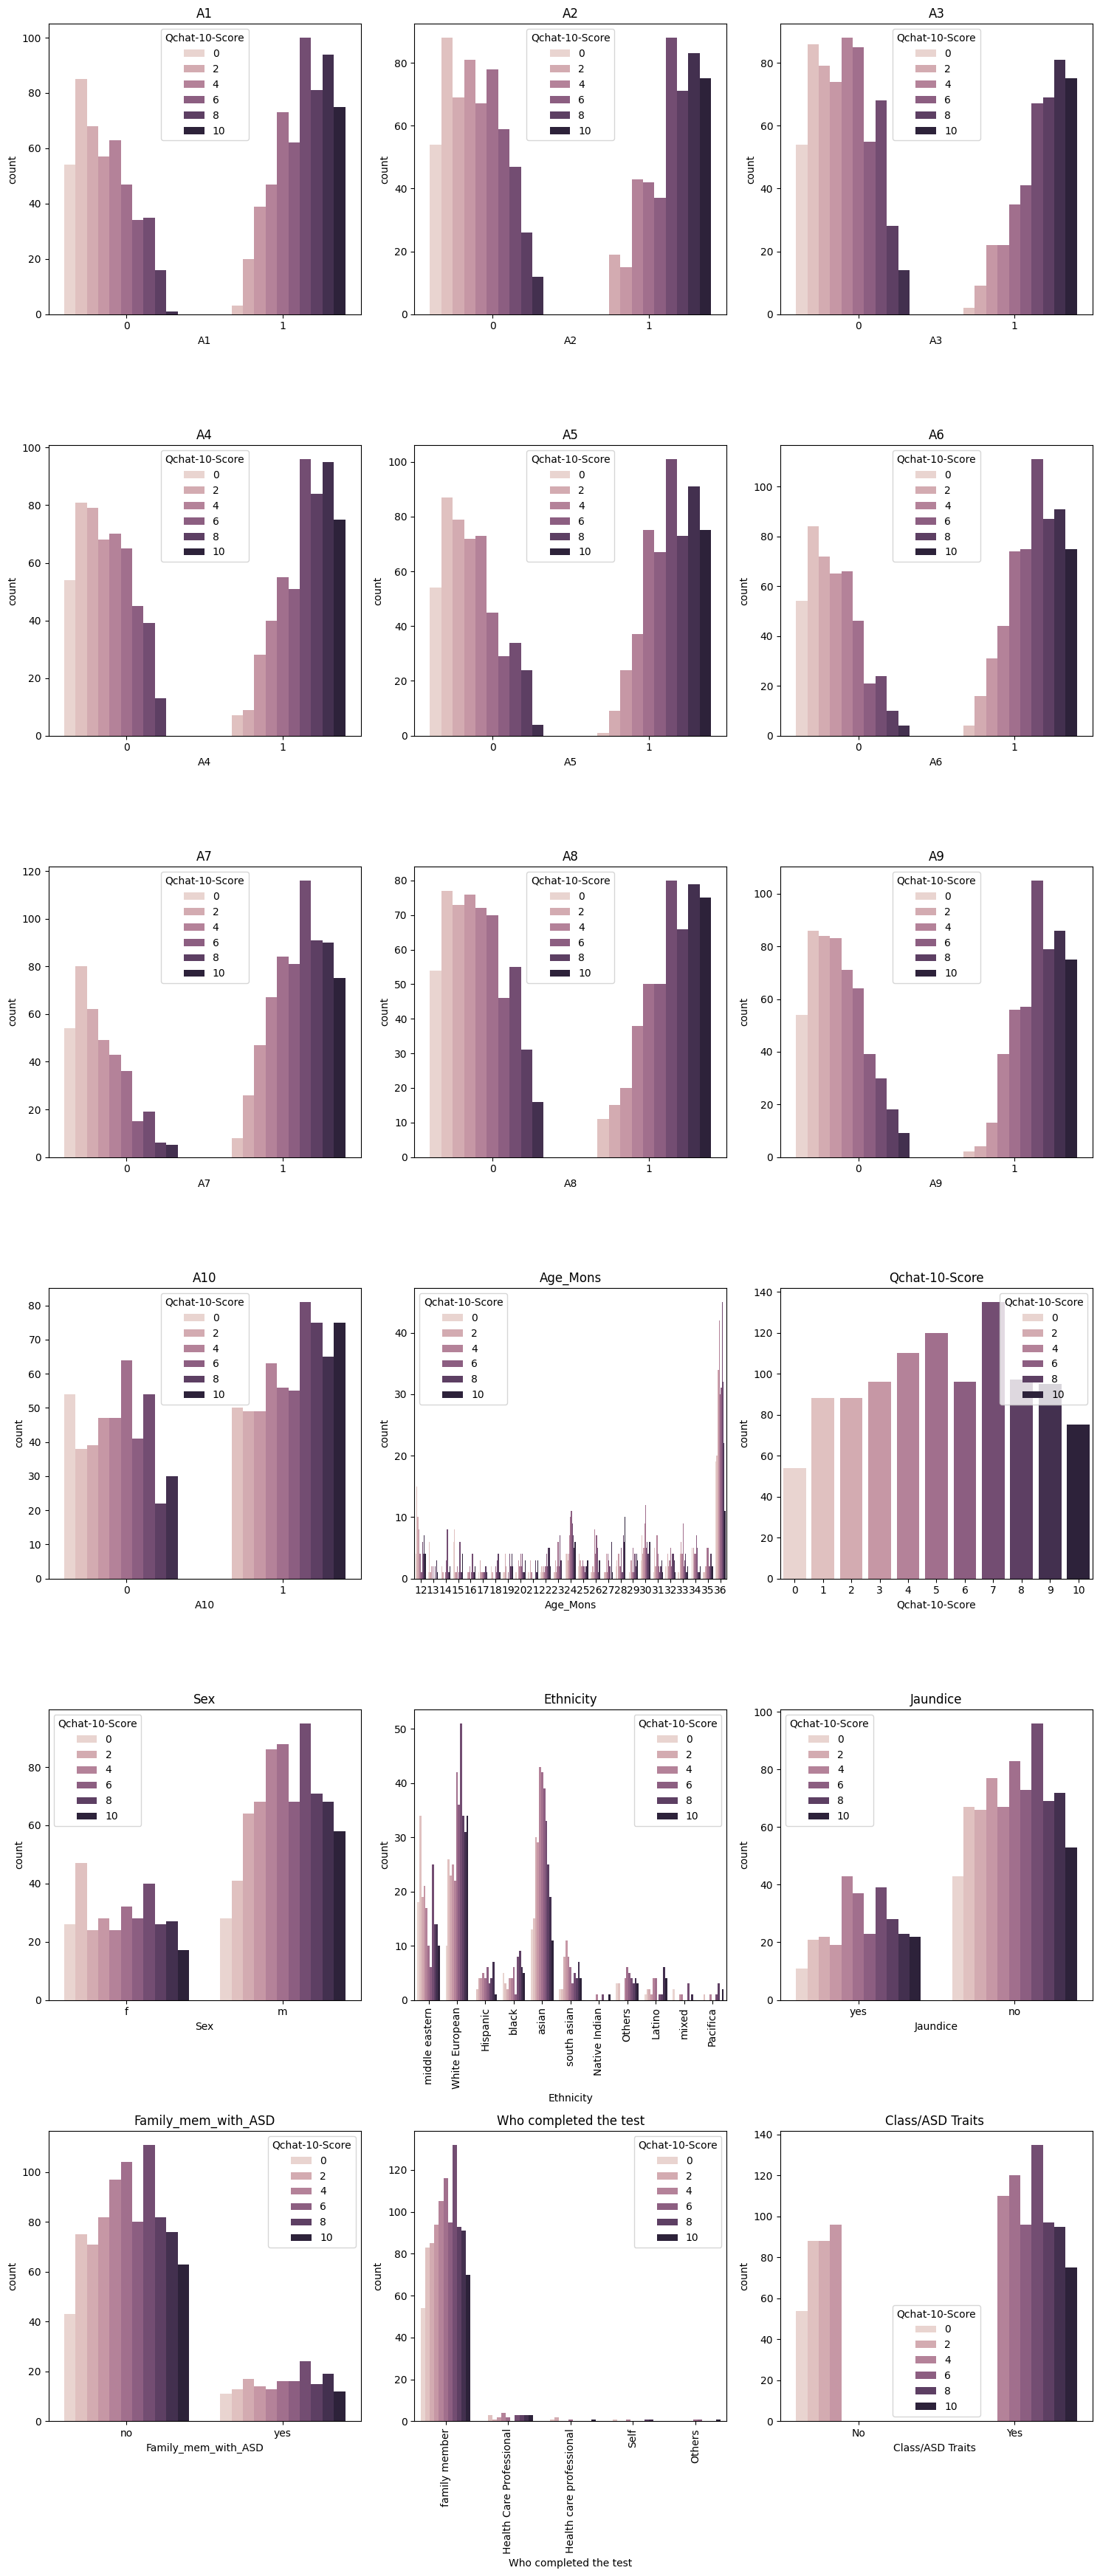

In [ ]:
#How the  Q-Chat-10 influences results
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(df.iloc[:, :]):
    sns.countplot(hue=df["Qchat-10-Score"], x=df[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

Conclusion : The toddlers with Qchat-10-Score value > 3 have ASD

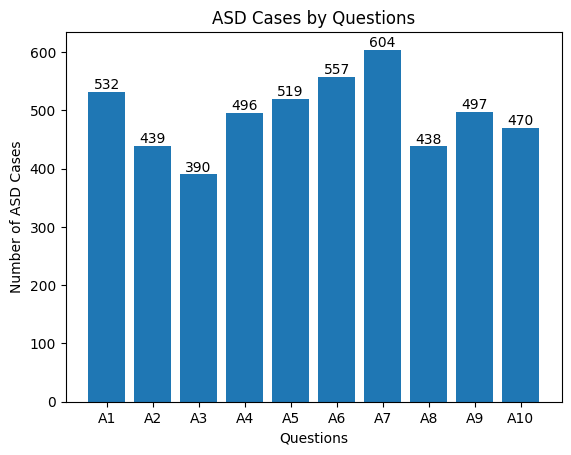

In [ ]:
#Questions
df=df[df['Class/ASD Traits '] == 'Yes']
sums=df[['A1', 'A2', 'A3', 'A4','A5','A6','A7','A8','A9','A10']].sum()
bars=plt.bar(sums.index,sums.values)
plt.xlabel('Questions')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Questions')
plt.xticks(ticks=range(len(sums.index)), labels=sums.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

Conclusion: Maximum number of toddlers suffering from autism does not get upset when their loved one get upset. This shows us that most of the autism patients shows lack of emotion.

# Processing Data

In [ ]:
# Drop irrelevant columns
df = df.drop(['Ethnicity', 'Who completed the test'], axis=1)

In [ ]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['Sex', 'Jaundice', 'Family_mem_with_ASD']
encoded_df = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
# Define the target variable as binary
encoded_df['ASD'] = (encoded_df['Class/ASD Traits '] == 'YES').astype(int)
encoded_df = encoded_df.drop('Class/ASD Traits ', axis=1)

In [ ]:
# Split the data into features (X) and target variable (y)
X = encoded_df.drop('ASD', axis=1)
y = encoded_df['ASD']

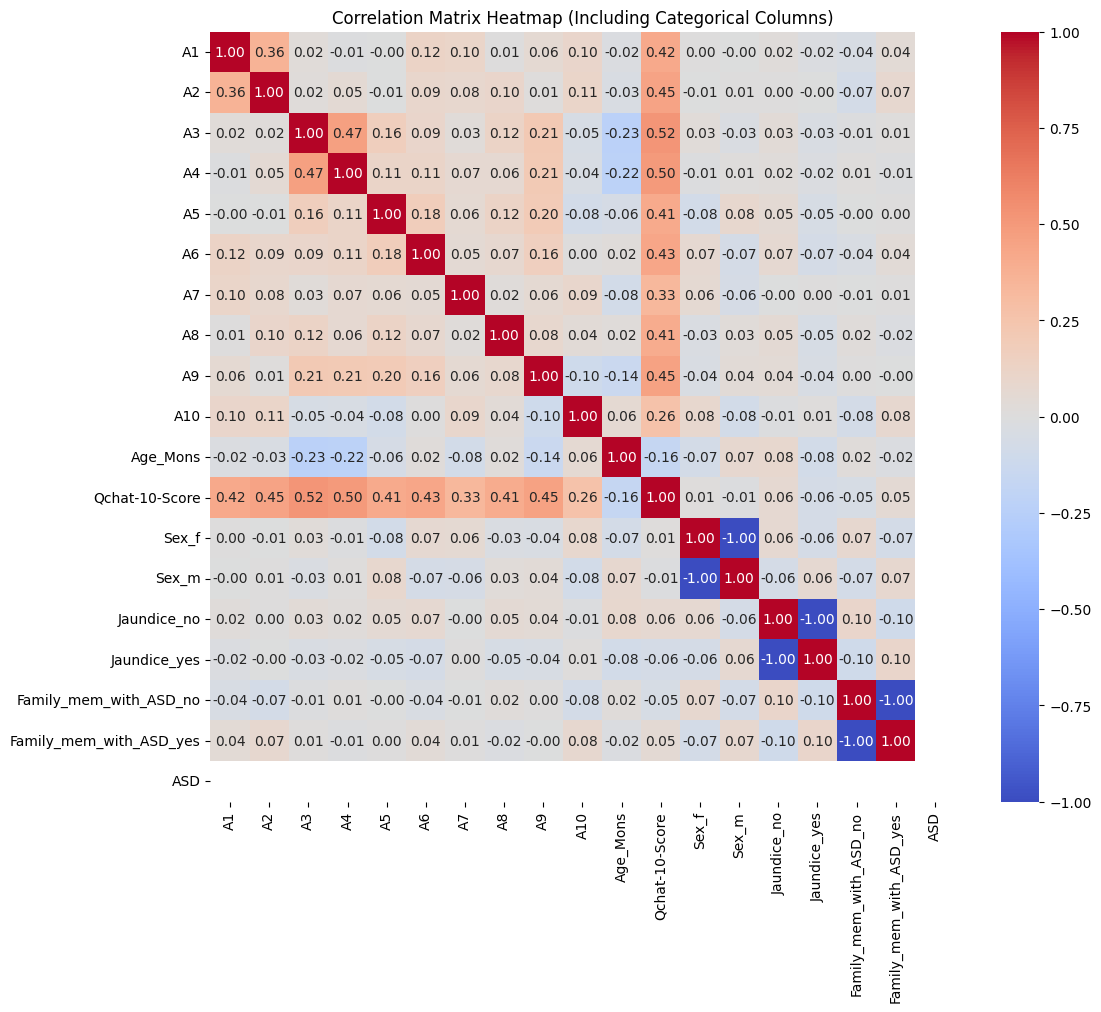

In [ ]:
# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap (Including Categorical Columns)")
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2 model training

In [ ]:
print("Shape of y_train:", y_train.shape)

Shape of y_train: (436,)


# **Section 2: Model Implementation**

#Model Without Optimization Techniques

In [ ]:
# Define the model architecture
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model without any optimizer
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 128)               2432      
                                                                 
 batch_normalization_22 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_23 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 64)              

In [ ]:
# Train the model
history = model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=1)

# Save the model
model1.save('saved_models/model1.pkl')



Epoch 1/50
14/14 [==============================] - 2s 78ms/step - loss: 0.9367 - accuracy: 0.5115 - val_loss: 0.5762 - val_accuracy: 0.9726
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 0.8695 - accuracy: 0.5436 - val_loss: 0.5875 - val_accuracy: 0.9726
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.8191 - accuracy: 0.5573 - val_loss: 0.5722 - val_accuracy: 0.9932
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.7645 - accuracy: 0.5872 - val_loss: 0.5535 - val_accuracy: 0.9932
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.7235 - accuracy: 0.6124 - val_loss: 0.5227 - val_accuracy: 0.9932
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6628 - val_loss: 0.4843 - val_accuracy: 0.9932
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.5858 - accuracy: 0.6995 - val_loss: 0.4544 - val_accuracy: 1.0000
Epoch 8/50
14/14 [=

In [ ]:
# Evaluate the model
_, train_accuracy = model1.evaluate(X_train, y_train)
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


5/5 [==============================] - 0s 3ms/step - loss: 5.2752e-04 - accuracy: 1.0000
Training Accuracy: 100.00%
Test Accuracy: 100.00%


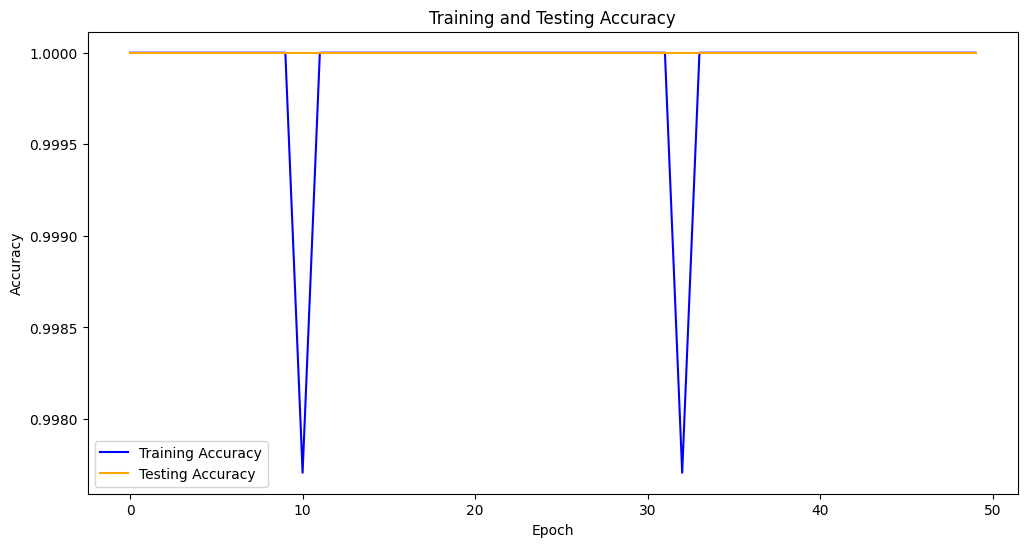

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

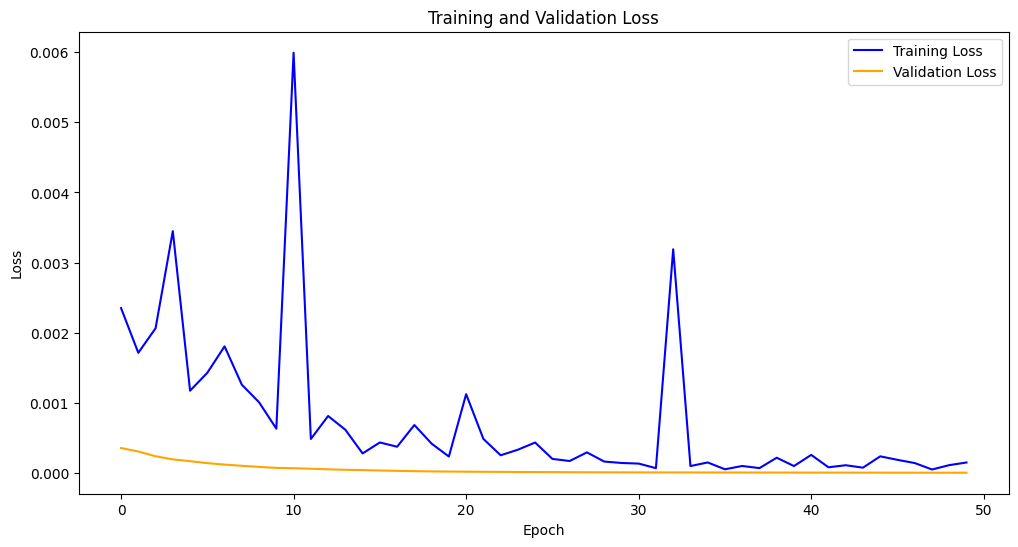

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model With Optimization Techniques

## 1. RMSprop

In [ ]:
# Define the model architecture
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model with RMSprop optimizer
model2.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               2432      
                                                                 
 batch_normalization_28 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_29 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_41 (Dropout)        (None, 64)              

In [ ]:
#Train model
RMSprop = model2.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=1)

# Save the model
model2.save('saved_models/model2.pkl')



Epoch 1/50
14/14 [==============================] - 2s 33ms/step - loss: 1.0969e-05 - accuracy: 1.0000 - val_loss: 8.9452e-08 - val_accuracy: 1.0000
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 1.9990e-04 - accuracy: 1.0000 - val_loss: 9.0125e-08 - val_accuracy: 1.0000
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 3.5371e-06 - accuracy: 1.0000 - val_loss: 9.0971e-08 - val_accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 6.2786e-06 - accuracy: 1.0000 - val_loss: 9.1662e-08 - val_accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 2.1467e-06 - accuracy: 1.0000 - val_loss: 9.1084e-08 - val_accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 0s 8ms/step - loss: 5.5917e-05 - accuracy: 1.0000 - val_loss: 9.0222e-08 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 3.8817e-06 - accuracy: 1.0000 - val_los

In [ ]:
# Print the final accuracy
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


5/5 [==============================] - 0s 3ms/step - loss: 1.4360e-07 - accuracy: 1.0000
Training Accuracy: 100.00%
Test Accuracy: 100.00%


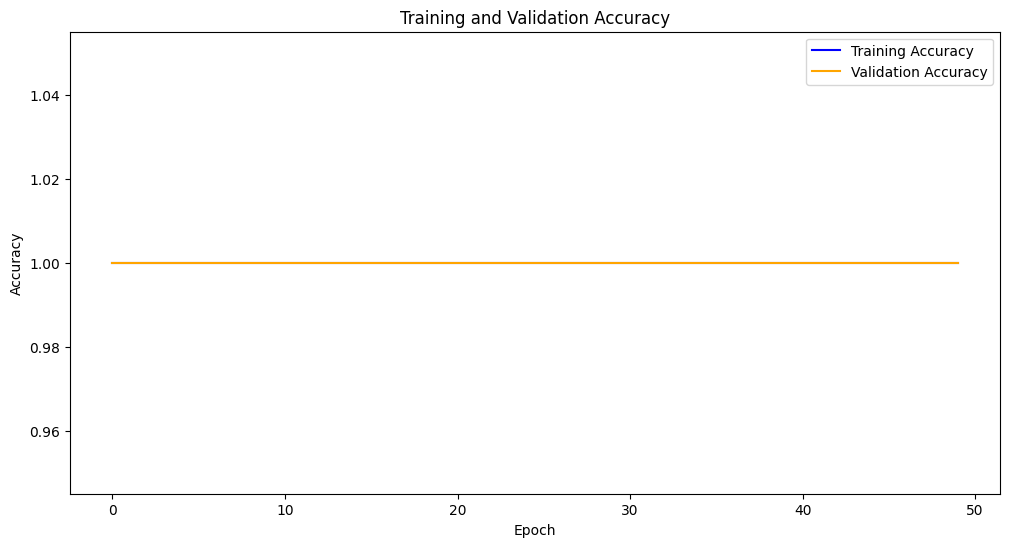

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(RMSprop.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(RMSprop.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

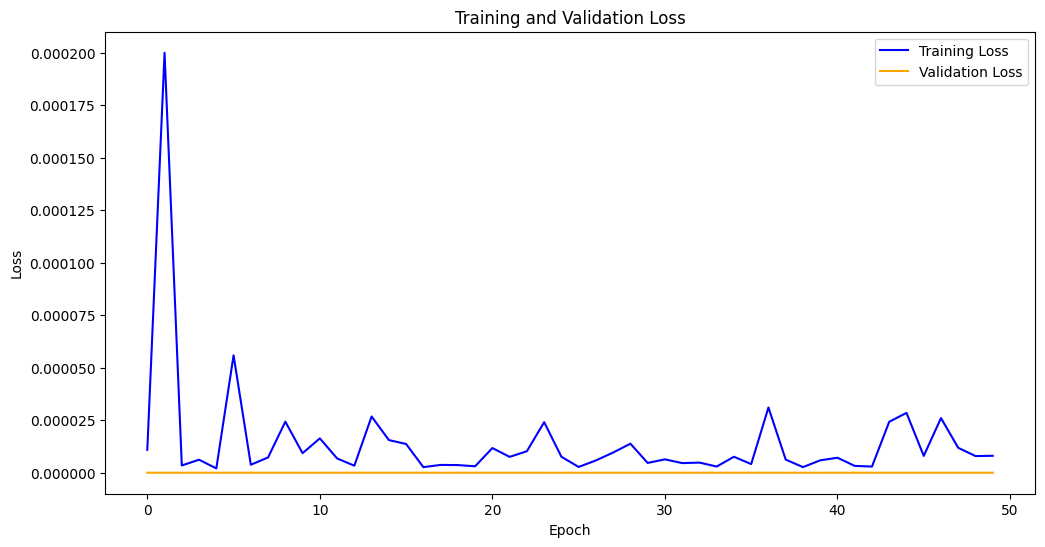

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(RMSprop.history['loss'], label='Training Loss', color='blue')
plt.plot(RMSprop.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 2. Scholastic Gradient Descent

In [ ]:
# Define the model architecture
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model with the SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               2432      
                                                                 
 batch_normalization_28 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_29 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_41 (Dropout)        (None, 64)              

In [ ]:
# Train the model
SGDClassifier = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Save the model
model3.save('saved_models/model3.pkl')

Epoch 1/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 9.9141e-04 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 9.6928e-04 - val_accuracy: 1.0000
Epoch 8/50


In [ ]:
# Print the final accuracy
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


5/5 [==============================] - 0s 4ms/step - loss: 9.0465e-08 - accuracy: 1.0000
Training Accuracy: 100.00%
Test Accuracy: 100.00%


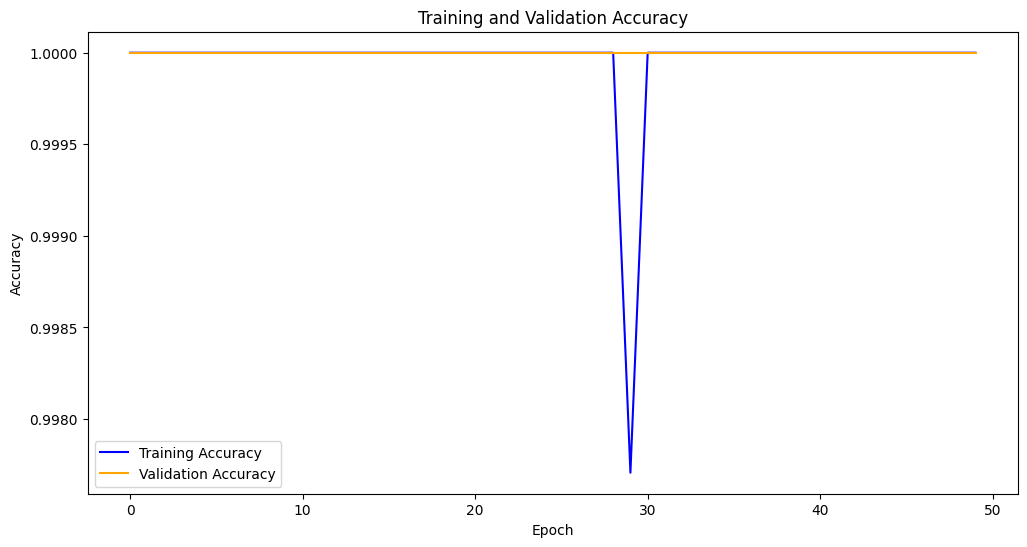

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(SGDClassifier.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(SGDClassifier.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

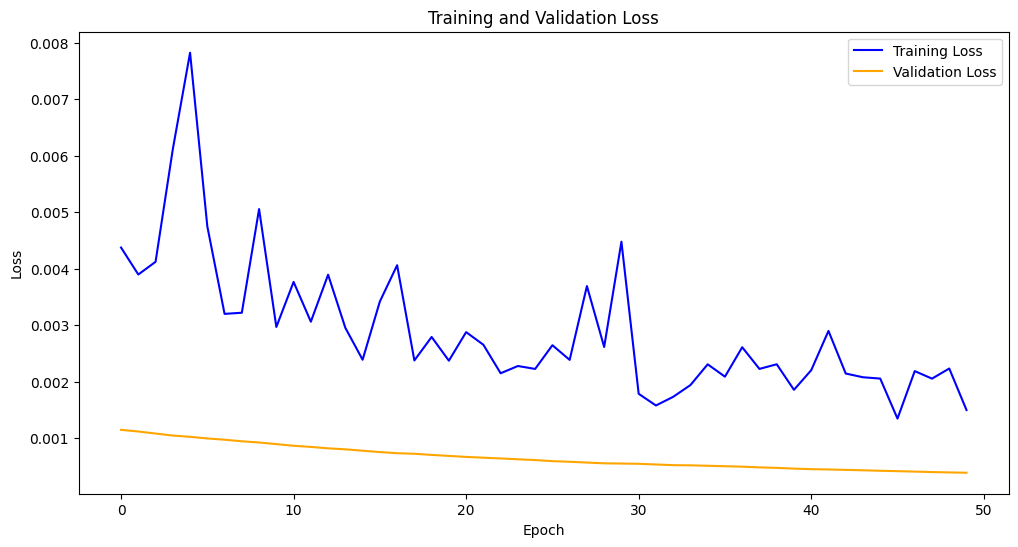

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(SGDClassifier.history['loss'], label='Training Loss', color='blue')
plt.plot(SGDClassifier.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3. Adam

In [ ]:
# Define the model architecture
model4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model with Adam optimizer
model4.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model4.summary()



Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 128)               2432      
                                                                 
 batch_normalization_34 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_46 (Dropout)        (None, 128)               0         
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_35 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_47 (Dropout)        (None, 64)              

In [ ]:
# Train the model
ADAM = model4.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=1)

# Save the model
model4.save('saved_models/model4.pkl')



Epoch 1/50
14/14 [==============================] - 4s 24ms/step - loss: 1.0322 - accuracy: 0.5092 - val_loss: 0.6644 - val_accuracy: 0.6918
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 0.9043 - accuracy: 0.5275 - val_loss: 0.6598 - val_accuracy: 0.7329
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.8327 - accuracy: 0.5436 - val_loss: 0.6342 - val_accuracy: 0.8836
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.7508 - accuracy: 0.5803 - val_loss: 0.6065 - val_accuracy: 0.9521
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.7607 - accuracy: 0.5917 - val_loss: 0.5830 - val_accuracy: 0.9795
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6815 - accuracy: 0.6193 - val_loss: 0.5503 - val_accuracy: 0.9863
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6292 - accuracy: 0.6399 - val_loss: 0.5144 - val_accuracy: 1.0000
Epoch 8/50
14/14 [=

In [ ]:
# Print the final accuracy
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


5/5 [==============================] - 0s 3ms/step - loss: 9.0465e-08 - accuracy: 1.0000
Training Accuracy: 100.00%
Test Accuracy: 100.00%


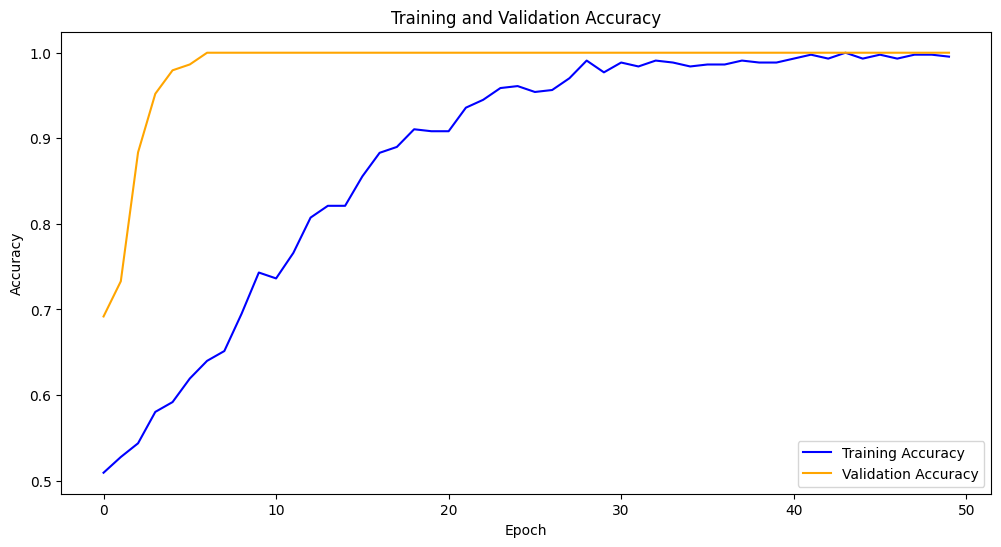

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(ADAM.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(ADAM.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

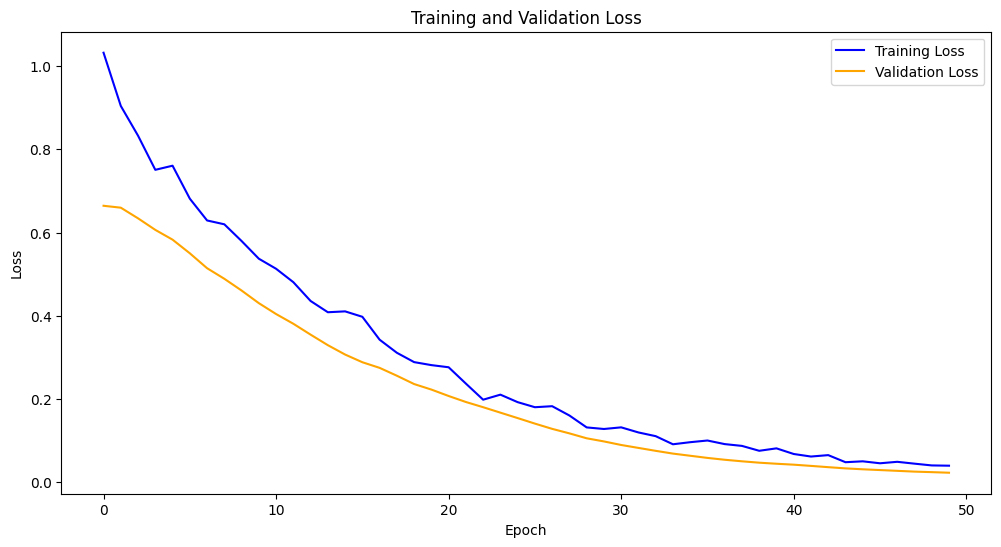

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(ADAM.history['loss'], label='Training Loss', color='blue')
plt.plot(ADAM.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Error Analysis

In [ ]:
def error_analysis(model, X_test, y_test):
    # Predictions on test set
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype('int32')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)

    # Precision
    precision = precision_score(y_test, y_pred_binary, zero_division=0)

    # Recall
    recall = recall_score(y_test, y_pred_binary, zero_division=0)

    # F1 Score
    f1 = f1_score(y_test, y_pred_binary, zero_division=0)

    # Specificity
    try:
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp)
    except ValueError:
        print("Error: Confusion matrix shape is not as expected.")
        specificity = None

    # Print error analysis
    print("Confusion Matrix:")
    print(cm)
    print("\nAccuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    if specificity is not None:
        print("Specificity:", specificity)

### 1. Without Optimization

In [ ]:
# Error analysis for model without optimization
model = model1
results_without_opt = error_analysis(model, X_test, y_test)
print(results_without_opt)

5/5 [==============================] - 0s 3ms/step
Confusion Matrix:
[[126  20]
 [  0   0]]

Accuracy: 0.863013698630137
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Specificity: 0.863013698630137
None


### 2. RMSprop

In [ ]:
# Error analysis for RMSprop model
model = model2
results_with_rmsprop = error_analysis(model, X_test, y_test)
print(results_with_rmsprop)

5/5 [==============================] - 0s 3ms/step
Error: Confusion matrix shape is not as expected.
Confusion Matrix:
[[146]]

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
None


## 3. Scholastic Gradient Descent

In [ ]:
# Error analysis for SGD model
model = model3
results_with_sgd = error_analysis(model, X_test, y_test)
print(results_with_sgd)

5/5 [==============================] - 0s 2ms/step
Error: Confusion matrix shape is not as expected.
Confusion Matrix:
[[146]]

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
None


### 4. Adam

In [ ]:
# Error analysis for ADAM model
model = model4
results_with_adam = error_analysis(model, X_test, y_test)
print(results_with_adam)

5/5 [==============================] - 0s 10ms/step
Error: Confusion matrix shape is not as expected.
{'Accuracy': 1.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'Specificity': None}


# Model Performance Comparism

In [ ]:
# Create DataFrame for model without optimization
dframe_without_opt = pd.DataFrame([results_without_opt],
                                  columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
dframe_without_opt.index = ["Without Optimization"]

# Create DataFrame for RMSprop model
dframe_with_rmsprop = pd.DataFrame([results_with_rmsprop],
                                   columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
dframe_with_rmsprop.index = ["RMSprop"]

# Create DataFrame for SGD model
dframe_with_sgd = pd.DataFrame([results_with_sgd],
                               columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
dframe_with_sgd.index = ["SGD"]

# Create DataFrame for ADAM model
dframe_with_adam = pd.DataFrame([results_with_adam],
                                columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
dframe_with_adam.index = ["ADAM"]

# Concatenate DataFrames
result = pd.concat([dframe_without_opt, dframe_with_rmsprop, dframe_with_sgd, dframe_with_adam])

# Display result DataFrame
print(result)


                      Accuracy  Precision  Recall  F1 Score
Without Optimization  0.863014        0.0     0.0       0.0
RMSprop               1.000000        0.0     0.0       0.0
SGD                   1.000000        0.0     0.0       0.0
ADAM                  1.000000        0.0     0.0       0.0
